In [21]:
import pandas as pd

df = pd.read_csv('life_expectancy.csv')
df = df[df['Gender'] == 'Male']
df = df.drop(['Year', 'Gender', 'Country', 'Region'], axis=1)
df = df.dropna()
df.head(40)

,LifeExpectancy,Income,Education,GDPperCapita,BirthRate,MortalityRate
0,76,60000.0,Bachelor,50000,12.0,5.0
2,84,50000.0,Bachelor,40000,7.0,2.0
4,81,60000.0,Master,50000,10.0,3.0
6,76,40000.0,High School,30000,15.0,6.0
8,78,60000.0,Doctorate,50000,8.0,2.0
10,77,60000.0,High School,50000,10.0,3.0
12,77,60000.0,Bachelor,50000,12.0,4.0
17,81,60000.0,Doctorate,50000,8.0,2.0
19,68,60000.0,Bachelor,50000,12.0,5.0
21,75,40000.0,Master,30000,11.0,3.0


In [22]:
df.describe()

,LifeExpectancy,Income,GDPperCapita,BirthRate,MortalityRate
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,77.333333,55000.000000,45000.000000,10.416667,3.500000
std,4.052683,7977.240352,7977.240352,2.539088,1.445998
min,68.000000,40000.000000,30000.000000,7.000000,2.000000
25%,75.750000,50000.000000,40000.000000,8.000000,2.000000
50%,77.000000,60000.000000,50000.000000,10.500000,3.000000
75%,80.250000,60000.000000,50000.000000,12.000000,5.000000
max,84.000000,60000.000000,50000.000000,15.000000,6.000000


In [23]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# df[['Income', 'GDPperCapita']] = scaler.fit_transform(df[['Income', 'GDPperCapita']])
# df.head(40)

In [24]:
edu_map = {'High School':1, 'Bachelor':2, 'Master':3, 'Doctorate':4}
df['Education'] = df['Education'].map(edu_map)
df.head()

,LifeExpectancy,Income,Education,GDPperCapita,BirthRate,MortalityRate
0,76,60000.0,2,50000,12.0,5.0
2,84,50000.0,2,40000,7.0,2.0
4,81,60000.0,3,50000,10.0,3.0
6,76,40000.0,1,30000,15.0,6.0
8,78,60000.0,4,50000,8.0,2.0


In [39]:
X = df[['BirthRate']]
y = df[['LifeExpectancy']]

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lr = LinearRegression()
lr.fit(X_poly, y)

LinearRegression()

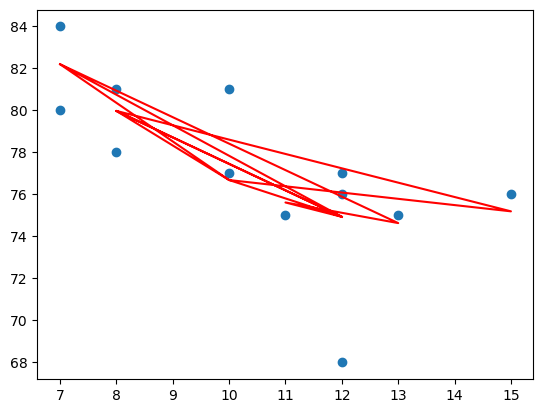

In [40]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, lr.predict(poly.fit_transform(X)), color='red')